In [164]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [165]:
class LinearRegression:
    def __init__(self,epochs,lr):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    def predict(self,X):
        X = tf.cast(X,dtype=tf.float64)
        return tf.tensordot(self.weights,tf.transpose(X),axes=1)+self.bias
    def fit(self,X,Y):
        Y = tf.cast(Y,dtype=tf.float64)
        m_samp,n_feat = X.shape
        self.weights=tf.Variable(tf.zeros(n_feat,dtype=tf.float64))
        self.bias=tf.Variable(0.0,dtype=tf.float64)
        for epoch in range(self.epochs):
            
            with tf.GradientTape() as tape:
                y = tf.tensordot(self.weights,tf.transpose(X),axes=1)+self.bias
                loss = (1/len(y))*tf.reduce_sum((y-Y)**2)
                if epoch%100==0:
                  print('loss:',loss)
            [dw,db] = tape.gradient(loss,[self.weights,self.bias])
          
            self.weights.assign_sub(self.lr*dw)
            self.bias.assign_sub(self.lr*db)



In [166]:
wei = tf.Variable(34.0)
b = tf.Variable(6.0)
with tf.GradientTape() as tape:
    x=23
    y = wei*x+b
dw,db = tape.gradient(y,[wei,b])
print(dw,db)

tf.Tensor(23.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [167]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


In [168]:
data = fetch_california_housing(as_frame=True)
# scalar = StandardScaler()

In [169]:
dt =pd.DataFrame(data.data)
dt['target']=data.target

In [170]:
dt.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns


In [172]:
corr=dt.corr()

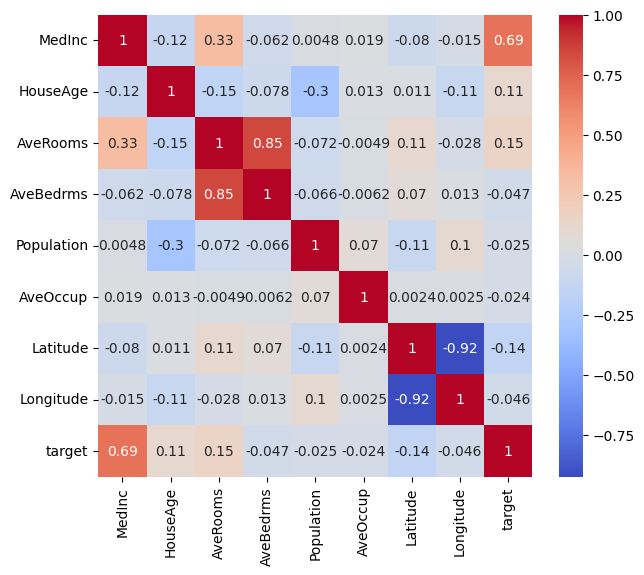

In [173]:
plt.figure(figsize=(7,6))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()


In [174]:
# dt.drop(['AveBedrms','Longitude'],axis=1,inplace=True)

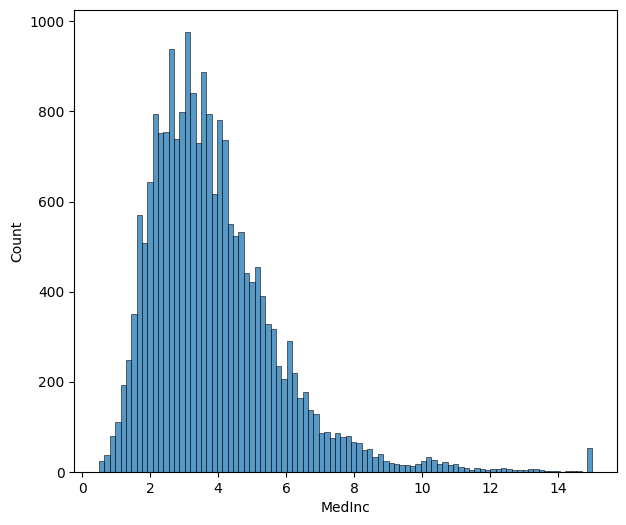

In [175]:
plt.figure(figsize=(7,6))
sns.histplot(data=dt,x='MedInc')
plt.show()

In [176]:
def remove_out(dt):
    for col in dt.columns:
        Q1=dt[col].quantile(0.25)
        Q3=dt[col].quantile(0.75)
        IQR=Q3-Q1
        lower = Q1-1.5*IQR
        upper=Q3+1.5*IQR
        dt = dt[(dt[col]>=lower)&(dt[col]<=upper)]
    return dt    

In [177]:
dt = remove_out(dt)

In [178]:
dt.iloc[:,:-1] = scalar.fit_transform(dt.iloc[:,:-1])

In [179]:
dt.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
3,1.389789,1.853373,0.642988,0.397607,-1.137880,-0.512029,1.018223,-1.316298,3.413
4,0.137604,1.853373,1.091080,0.519467,-1.126831,-1.097335,1.018223,-1.316298,3.422
5,0.270425,1.853373,-0.375410,0.861967,-1.366750,-1.163728,1.018223,-1.316298,2.697
6,0.007221,1.853373,-0.211176,-1.451132,-0.291852,-1.182082,1.013553,-1.316298,2.992
7,-0.368455,1.853373,-0.340808,0.226925,-0.192412,-1.725341,1.013553,-1.316298,2.414


In [180]:
from sklearn.preprocessing import PowerTransformer

In [181]:
# transformer = PowerTransformer(method='yeo-johnson')

In [182]:
# dt.iloc[:,:-1] = transformer.fit_transform(dt.iloc[:,:-1])

In [183]:
dt = tf.convert_to_tensor(dt.values,dtype=tf.float64)

In [184]:
dt = pd.DataFrame(dt)
dt

,0,1,2,3,4,5,6,7,8
0,1.389789,1.853373,0.642988,0.397607,-1.137880,-0.512029,1.018223,-1.316298,3.413
1,0.137604,1.853373,1.091080,0.519467,-1.126831,-1.097335,1.018223,-1.316298,3.422
2,0.270425,1.853373,-0.375410,0.861967,-1.366750,-1.163728,1.018223,-1.316298,2.697
3,0.007221,1.853373,-0.211176,-1.451132,-0.291852,-1.182082,1.013553,-1.316298,2.992
4,-0.368455,1.853373,-0.340808,0.226925,-0.192412,-1.725341,1.013553,-1.316298,2.414
...,...,...,...,...,...,...,...,...,...
16227,0.044434,-0.115944,1.570730,1.539936,-0.375508,0.251738,1.681359,-0.970488,1.168
16228,-1.455345,-0.362109,-0.101639,1.313245,-0.684876,-0.491808,1.779428,-0.734937,0.781
16229,-1.357994,-1.018548,0.052793,1.112098,-0.429174,-0.867083,1.756079,-0.800089,0.923
16230,-1.241480,-0.936493,0.172384,1.899422,-0.849031,-1.190380,1.756079,-0.850207,0.847


In [185]:
x_train,x_test,y_train,y_test = train_test_split(dt.iloc[:,:-1],dt.iloc[:,-1],test_size=0.2,random_state=11,shuffle=True)

In [186]:
model = LinearRegression(1000,0.1)

In [187]:
model.fit(x_train,y_train)

loss: tf.Tensor(4.512249259992307, shape=(), dtype=float64)
loss: tf.Tensor(0.3152826198301196, shape=(), dtype=float64)
loss: tf.Tensor(0.3099051748118003, shape=(), dtype=float64)
loss: tf.Tensor(0.30898945596535377, shape=(), dtype=float64)
loss: tf.Tensor(0.3088332893817082, shape=(), dtype=float64)
loss: tf.Tensor(0.30880665673743574, shape=(), dtype=float64)
loss: tf.Tensor(0.3088021148071168, shape=(), dtype=float64)
loss: tf.Tensor(0.30880134022646266, shape=(), dtype=float64)
loss: tf.Tensor(0.3088012081295022, shape=(), dtype=float64)
loss: tf.Tensor(0.3088011856016907, shape=(), dtype=float64)


In [188]:
pred = model.predict(x_test)

In [189]:
model.weights

<tf.Variable 'Variable:0' shape=(8,) dtype=float64, numpy=
array([ 0.63751069,  0.12320207, -0.12336683,  0.08484307,  0.05413203,
       -0.2285625 , -0.83701638, -0.77710513])>

In [ ]:
pred = pred.numpy()

In [195]:
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [192]:
print("rmse:",root_mean_squared_error(y_test,pred))

rmse: 0.5725976957292285


In [193]:
print('r2 score:',r2_score(y_test,pred))

r2 score: 0.6303768342833121


In [197]:
from sklearn.linear_model import LinearRegression